# Unsupervised Learning: K-Means Clustering on Customer Personality Analysis Dataset (Newest Dataset on Kaggle!)

<p align="center">
  <img width=500 src="https://storage.googleapis.com/kaggle-datasets-images/1546318/2549419/519ae15c262818cdd94fa315325858aa/dataset-card.png?t=2021-08-22-18-33-50"/>
</p>

**Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

**Data Dictionary**

**People**
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

**Products**
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**
- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

**Target**

Need to perform clustering to summarize customer segments.

## Import Library and Dataset

In [486]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score 
from sklearn.preprocessing import StandardScaler

from yellowbrick.cluster import KElbowVisualizer

import datetime

import warnings
warnings.filterwarnings('ignore')

In [487]:
df_ori = pd.read_csv('dataset/marketing_campaign.csv',sep='\t')
df = df_ori.copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [488]:
print('Shape of the dataset is:',df.shape)

Shape of the dataset is: (2240, 29)


## Data Cleansing

In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [490]:
print('Total duplicated data:',df.duplicated().sum())

Total duplicated data: 0


**ID**

we will drop ID because we will not use it as feature

In [491]:
df.drop(columns='ID',inplace=True)

**Year_Birth**

We will transform "Year_Birth" into "Age" column, by make a new column and drop the "Year_Birth" column.

In [492]:
# Age of customer today (2021)
df['Age'] = 2021-df['Year_Birth']

In [493]:
df['Age'].describe()

count    2240.000000
mean       52.194196
std        11.984069
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max       128.000000
Name: Age, dtype: float64

**Education**

We will segmenting the "education" column into three groups, and we will encode this feature because "Education" is categorical

In [494]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [495]:
# Segmenting education levels in three groups
df['Education'] = df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate",
                                           "Graduation":"Graduate", 
                                           "Master":"Postgraduate","PhD":"Postgraduate"
                                          })

In [496]:
df['Education'].value_counts()

Graduate         1127
Postgraduate      856
Undergraduate     257
Name: Education, dtype: int64

**Marital Status**

Same as "Education", we will segmenting the "Marital Status" column into two groups, and we will encode this feature because "Marital Status" is categorical

In [497]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [498]:
# Segmenting marital status in two groups
df['Marital_Status'] = df['Marital_Status'].replace({"Married":"Relationship","Together":"Relationship",
                                                    "Divorced":"Single","Widow":"Single","Alone":"Single","YOLO":"Single","Absurd":"Single",
                                                    })

In [499]:
df['Marital_Status'].value_counts()

Relationship    1444
Single           796
Name: Marital_Status, dtype: int64

**Income**

For "income "missing value, we will handle it by fill it with *mode*

In [500]:
print('Total missing value in column before fillna:',df['Income'].isna().sum())
df.fillna(df['Income'].mode(), inplace=True)
print('Total missing value in column after fillna:',df['Income'].isna().sum())

Total missing value in column before fillna: 24
Total missing value in column after fillna: 24


In [501]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

**KidHome** and **Teenhome**

We will summarize these two column into one as "Child" column, it means how many Childs are customer have in their house.

In [502]:
df['Child'] = df['Kidhome'] + df['Teenhome']

In [503]:
df['Child'].value_counts()

1    1128
0     638
2     421
3      53
Name: Child, dtype: int64

**Dt_Customer (Customer_For_Days)**

Change data type of "Dt_Customer" from *object* into *datetime* and transform it into "Customer_For_Days" column.

In [504]:
print('Dt_Customer data type before:',df['Dt_Customer'].dtypes)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
print('Dt_Customer data type after:',df['Dt_Customer'].dtypes)

Dt_Customer data type before: object
Dt_Customer data type after: datetime64[ns]


In [505]:
days = []
d1 = datetime.datetime.now()
for i in df['Dt_Customer']:
    delta = d1 - i
    days.append(delta.days)
df["Customer_For_Days"] = days

In [506]:
df["Customer_For_Days"].describe()

count    2240.000000
mean     3027.043304
std       232.229893
min      2515.000000
25%      2855.750000
50%      3028.000000
75%      3200.250000
max      3578.000000
Name: Customer_For_Days, dtype: float64

**MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts and MntGoldProds (Expenses)**

Summarize these columns into one, named "Expenses"

In [507]:
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [508]:
df['Expenses'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Expenses, dtype: float64

**NumWebPurchases, NumCatalogPurchases, NumStorePurchases, and NumDealsPurchases (TotalNumPurchases)**

Summarize these columns into one, named "TotalNumPurchases"

In [509]:
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [510]:
df['TotalNumPurchases'].describe()

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: TotalNumPurchases, dtype: float64

**AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5 and Response (TotalAcceptedCmp)**

Summarize these columns into one, named "TotalAcceptedCmp"

In [511]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [512]:
df['TotalAcceptedCmp'].value_counts()

0    1631
1     370
2     142
3      51
4      36
5      10
Name: TotalAcceptedCmp, dtype: int64

**Z_CostContact** and **Z_CostContact** 

Because of these columns only have 1 unique value, we can drop these 2 columns.

In [513]:
df.nunique()

Year_Birth               59
Education                 3
Marital_Status            2
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
Age                      59
Child                     4
Customer_For_Days       663
Expenses               1054
TotalNumPurchases        39
TotalAcceptedCmp          6
dtype: int64

In [514]:
df.drop(columns=['Z_Revenue','Z_CostContact'],inplace=True)

**Drop useless columns**

In [515]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Child',
       'Customer_For_Days', 'Expenses', 'TotalNumPurchases',
       'TotalAcceptedCmp'],
      dtype='object')

In [516]:
df.drop(columns=['Year_Birth','Kidhome','Teenhome','Dt_Customer','Recency','MntWines', 'MntFruits',
                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                  'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                  'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                  'AcceptedCmp2','Complain','Response'
                ], inplace=True)

In [517]:
df = df[[df.columns[i] for i in [0,1,3,4,2,6,7,8,5]]]
df.head()

,Education,Marital_Status,Age,Child,Income,Expenses,TotalNumPurchases,TotalAcceptedCmp,Customer_For_Days
0,Graduate,Single,64,0,58138.0,1617,25,1,3486
1,Graduate,Single,67,2,46344.0,27,6,0,2640
2,Graduate,Relationship,56,0,71613.0,776,21,0,2987
3,Graduate,Relationship,37,1,26646.0,53,8,0,2580
4,Postgraduate,Relationship,40,1,58293.0,422,19,0,2836


**Find outlier**

<Figure size 432x288 with 0 Axes>

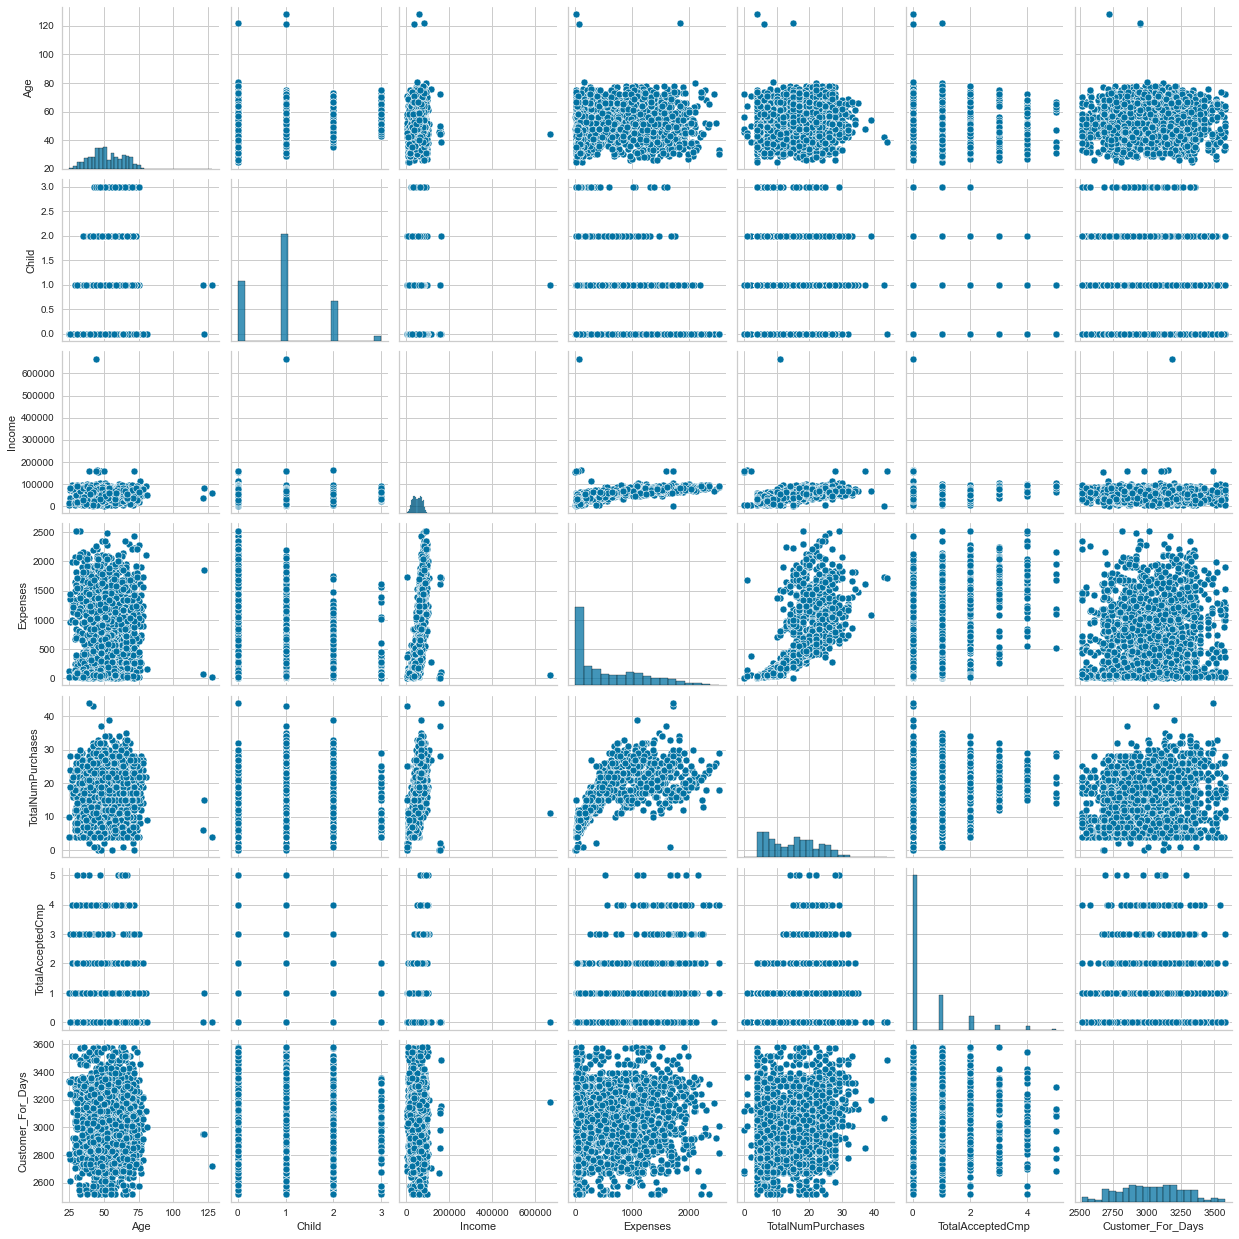

In [518]:
plt.figure()
sns.pairplot(df[df.describe().columns])
plt.show()

We can see there is an outlier in "Income" and "Age". Take a close look at the plot below:

Text(0, 0.5, 'Income')

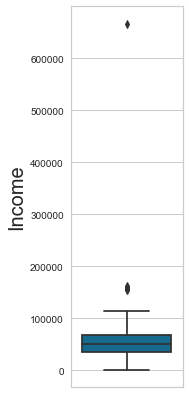

In [519]:
plt.figure(figsize=(2,7))
sns.boxplot(y = df['Income'])
plt.ylabel('Income', fontsize = 20)

Text(0, 0.5, 'Age')

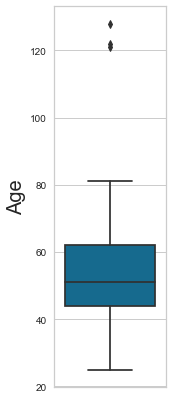

In [520]:
plt.figure(figsize=(2,7))
sns.boxplot(y = df['Age'])
plt.ylabel('Age', fontsize = 20)

Text(0, 0.5, 'Expenses')

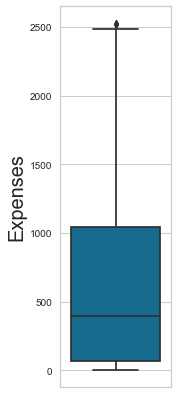

In [521]:
plt.figure(figsize=(2,7))
sns.boxplot(y = df['Expenses'])
plt.ylabel('Expenses', fontsize = 20)

There is outliers in "Age", "Income" and "Expenses" columns, so we need to remove them.

In [522]:
df = df[df.Age < 90][df.Income < 120000][df.Expenses < 2500]
print('Total dataset after removing outlier:',len(df))

Total dataset after removing outlier: 2202


**Summary: Data Cleansing**

In [523]:
df

,Education,Marital_Status,Age,Child,Income,Expenses,TotalNumPurchases,TotalAcceptedCmp,Customer_For_Days
0,Graduate,Single,64,0,58138.0,1617,25,1,3486
1,Graduate,Single,67,2,46344.0,27,6,0,2640
2,Graduate,Relationship,56,0,71613.0,776,21,0,2987
3,Graduate,Relationship,37,1,26646.0,53,8,0,2580
4,Postgraduate,Relationship,40,1,58293.0,422,19,0,2836
...,...,...,...,...,...,...,...,...,...
2235,Graduate,Relationship,54,1,61223.0,1341,18,0,3056
2236,Postgraduate,Relationship,75,3,64014.0,444,22,1,2576
2237,Graduate,Single,40,0,56981.0,1241,19,1,2830
2238,Postgraduate,Relationship,65,1,69245.0,843,23,0,2831


In [524]:
df.describe()

,Age,Child,Income,Expenses,TotalNumPurchases,TotalAcceptedCmp,Customer_For_Days
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,52.124432,0.950045,51570.283379,604.208901,14.878747,0.447775,3027.265668
std,11.687703,0.748922,20679.438848,597.901660,7.613942,0.890786,232.595745
min,25.000000,0.000000,1730.000000,5.000000,0.000000,0.000000,2515.000000
25%,44.000000,0.000000,35182.500000,69.000000,8.000000,0.000000,2855.250000
50%,51.000000,1.000000,51258.500000,396.500000,15.000000,0.000000,3028.000000
75%,62.000000,1.000000,68146.500000,1043.750000,21.000000,1.000000,3201.000000
max,81.000000,3.000000,113734.000000,2486.000000,43.000000,5.000000,3578.000000


## Data preprocessing

In [525]:
#get categorical columns
print('Categorical features:',list(set(df.columns)-set(df._get_numeric_data().columns)))

Categorical features: ['Education', 'Marital_Status']


**Ordinal Encode for Education**

In [526]:
df.Education.value_counts()

Graduate         1112
Postgraduate      838
Undergraduate     252
Name: Education, dtype: int64

In [527]:
df.Education.replace({'Undergraduate':0,'Graduate':1,'Postgraduate':2,},inplace=True)
df.Education = df.Education.astype(int)

**One-hot Encode for Marital_Status**

In [528]:
df.Marital_Status.value_counts()

Relationship    1421
Single           781
Name: Marital_Status, dtype: int64

In [529]:
df["Relationship"] = pd.get_dummies(df.Marital_Status).Relationship
df.drop(columns='Marital_Status',inplace=True)
df = df[[df.columns[i] for i in [0,8,1,2,3,4,5,6,7]]]

**Dataset Encoded**

In [530]:
df.head()

,Education,Relationship,Age,Child,Income,Expenses,TotalNumPurchases,TotalAcceptedCmp,Customer_For_Days
0,1,0,64,0,58138.0,1617,25,1,3486
1,1,0,67,2,46344.0,27,6,0,2640
2,1,1,56,0,71613.0,776,21,0,2987
3,1,1,37,1,26646.0,53,8,0,2580
4,2,1,40,1,58293.0,422,19,0,2836


**Standard Scaler**

In [531]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = pd.DataFrame(scaler.transform(df),columns=df.columns)

In [532]:
df_scaled.head()

,Education,Relationship,Age,Child,Income,Expenses,TotalNumPurchases,TotalAcceptedCmp,Customer_For_Days
0,-0.408605,-1.348874,1.016304,-1.268839,0.317669,1.694294,1.329607,0.620071,1.972687
1,-0.408605,-1.348874,1.273043,1.402274,-0.252786,-0.965610,-1.166382,-0.502788,-1.665351
2,-0.408605,0.741359,0.331669,-1.268839,0.969430,0.287389,0.804136,-0.502788,-0.173154
3,-0.408605,0.741359,-1.294340,0.066717,-1.205543,-0.922115,-0.903646,-0.502788,-1.923368
4,1.126800,0.741359,-1.037602,0.066717,0.325166,-0.304816,0.541400,-0.502788,-0.822496


**Dataset encoded**

**Correlation between features**

In [533]:
df_scaled.corr()

,Education,Relationship,Age,Child,Income,Expenses,TotalNumPurchases,TotalAcceptedCmp,Customer_For_Days
Education,1.000000,-0.011891,0.196089,0.062649,0.152251,0.093656,0.096185,0.059977,-0.073168
Relationship,-0.011891,1.000000,0.002046,0.041818,-0.010721,-0.019842,0.002282,-0.059995,-0.000912
Age,0.196089,0.002046,1.000000,0.090196,0.218133,0.127401,0.189391,-0.002430,-0.021849
Child,0.062649,0.041818,0.090196,1.000000,-0.348327,-0.499394,-0.249815,-0.253172,-0.036139
Income,0.152251,-0.010721,0.218133,-0.348327,1.000000,0.823397,0.701618,0.362803,-0.029645
Expenses,0.093656,-0.019842,0.127401,-0.499394,0.823397,1.000000,0.758003,0.451119,0.141297
TotalNumPurchases,0.096185,0.002282,0.189391,-0.249815,0.701618,0.758003,1.000000,0.257003,0.189869
TotalAcceptedCmp,0.059977,-0.059995,-0.002430,-0.253172,0.362803,0.451119,0.257003,1.000000,0.057884
Customer_For_Days,-0.073168,-0.000912,-0.021849,-0.036139,-0.029645,0.141297,0.189869,0.057884,1.000000


In [534]:
corr = df_scaled.corr().abs()
sol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
df_corr = pd.DataFrame(sol,columns=['correlation']).reset_index()
df_corr.head()

,level_0,level_1,correlation
0,Income,Expenses,0.823397
1,Expenses,TotalNumPurchases,0.758003
2,Income,TotalNumPurchases,0.701618
3,Child,Expenses,0.499394
4,Expenses,TotalAcceptedCmp,0.451119


"Income" and "Expenses" have the most correlation value.

## Clustering

In [535]:
pca = PCA(n_components=3,random_state=20)
pca.fit(df_scaled)
df_PCA = pd.DataFrame(pca.transform(df_scaled),columns=(["1","2","3"]))
df_PCA.describe().T

,count,mean,std,min,25%,50%,75%,max
1,2202.0,3.872167e-17,1.746400,-2.845685,-1.618742,-0.248461,1.414547,4.681741
2,2202.0,3.630157e-17,1.140808,-3.551249,-0.796853,-0.027713,0.773642,3.712509
3,2202.0,5.808251e-17,1.024444,-2.801839,-0.746467,0.004679,0.676534,3.355781


### Elbow Method

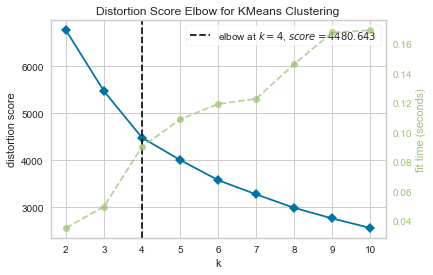

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [536]:
Elbow_M = KElbowVisualizer(KMeans(random_state=20), k=10)
Elbow_M.fit(df_PCA)
Elbow_M.show()

### K-Means Clustering (Optimize)

In [537]:
kmeans = KMeans(n_clusters=4,random_state=20)
y_kmeans = kmeans.fit_predict(df_PCA)
y_kmeans

array([1, 0, 3, ..., 1, 3, 0])

In [538]:
# add cluster columns into dataset
df['Cluster'] = y_kmeans
df_scaled['Cluster'] = y_kmeans

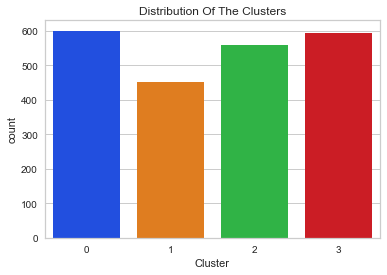

In [539]:
pl = sns.countplot(x=df["Cluster"],palette="bright")
pl.set_title("Distribution Of The Clusters")
plt.show()

The distribution of clusters seems fair.

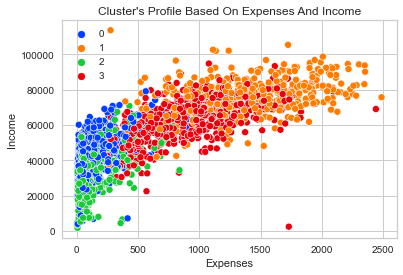

In [540]:
pl = sns.scatterplot(data=df,x=df["Expenses"],y=df["Income"],hue=df["Cluster"],palette="bright")
pl.set_title("Cluster's Profile Based On Expenses And Income")
plt.legend()
plt.show()

- Cluster 0 : Average Income and Low Expenses
- Cluster 1 : High Income and High Expenses
- Cluster 2 : Low Income and Low Expenses
- Cluster 3 : Average Income and High Expenses


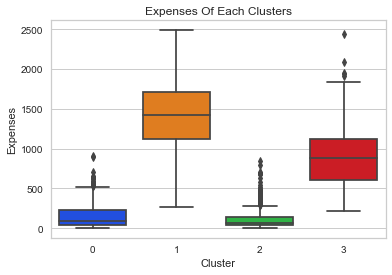

In [541]:
plt.figure()
pl=sns.boxplot(x=df["Cluster"],y=df["Expenses"],palette="bright")
pl.set_title("Expenses Of Each Clusters")
plt.show()

Cluster 1 is the biggest customers expenses followed by Cluster 3. 

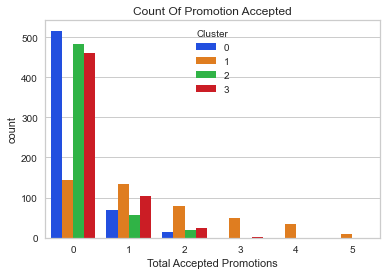

In [542]:
plt.figure()
pl = sns.countplot(x=df["TotalAcceptedCmp"],hue=df["Cluster"], palette="bright")
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Total Accepted Promotions")
plt.show()

Not many response to the promotions from each clusters.

## Profiling

<Figure size 432x288 with 0 Axes>

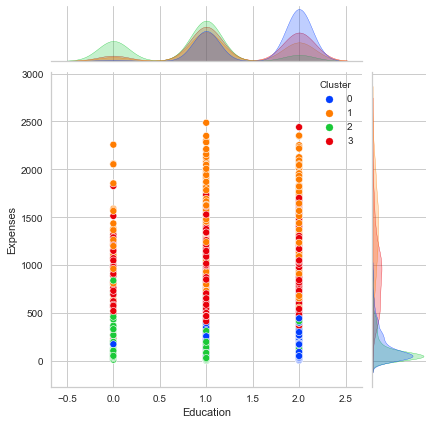

<Figure size 432x288 with 0 Axes>

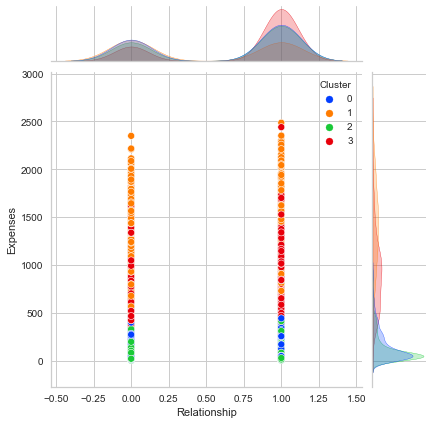

<Figure size 432x288 with 0 Axes>

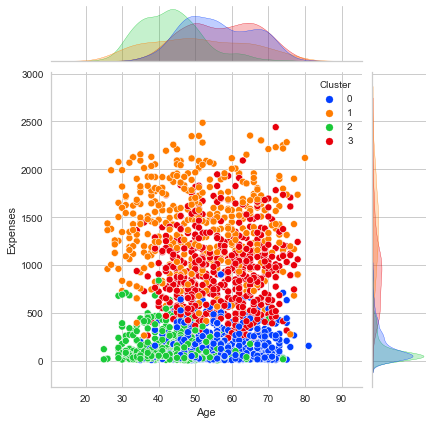

<Figure size 432x288 with 0 Axes>

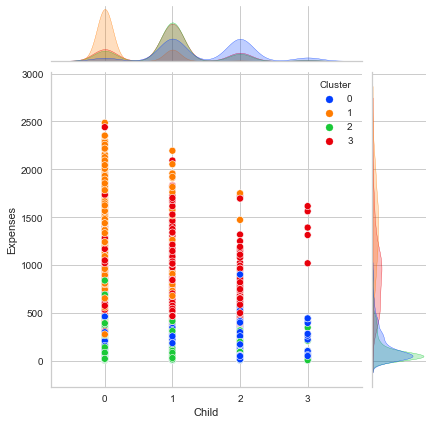

<Figure size 432x288 with 0 Axes>

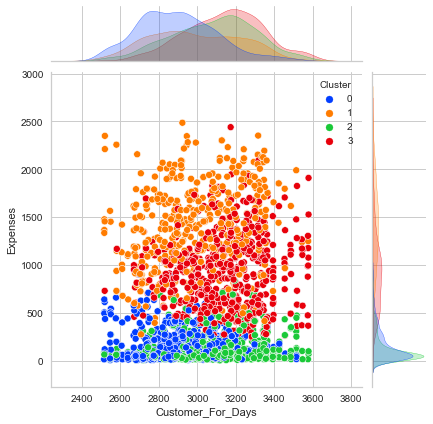

In [543]:
for i in ['Education','Relationship','Age','Child','Customer_For_Days']:
    plt.figure()
    sns.jointplot(x=df[i],y=df["Expenses"],hue=df["Cluster"],palette="bright")
    plt.show()

## **Summary**

- Cluster 0
  - Most of them are Post-Graduate students
  - Most of them are in relationship 
  - Relatively older
  - Most of them are having children at home
  - Some of them are old customer
- Cluster 1
  - Most of them are Gradute and Post-Graduate students
  - Most of them are not having children 
  - Variants of age
  - Most of them are not old customer
- Cluster 2
  - Definitely not Parent
  - Most of them are still Undergraduate and Graduate Students
  - Most of them are single
  - Young to Mid age people
  - Most of them are new Customer
- Cluster 3
  - Definitely are Parent
  - Most of them are in relationship
  - Most of them are having Children
  - Middle to Old people

## References

1. [Customer Personality Analysis: Analysis of company's ideal customers](https://www.kaggle.com/imakash3011/customer-personality-analysis)
1. [Understanding Delimiters in Pandas read_csv() Function](https://www.analyticsvidhya.com/blog/2021/04/delimiters-in-pandas-read_csv-function/)
2. [Pandas Convert Column to datetime – object/string, integer, CSV & Excel](https://www.marsja.se/pandas-convert-column-to-datetime/)
3. [Customer Segmentation: Clustering](https://www.kaggle.com/karnikakapoor/customer-segmentation-clustering/notebook)
4. [Sort Correlation Matrix in Python](https://www.geeksforgeeks.org/sort-correlation-matrix-in-python/)
5. [Check which columns in DataFrame are Categorical](https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical)